# COGS 189 Group 12 
*"Investigating the Impact of Short-Form Video Content on Cognitive Focus Using EEG"*


In [6]:
%pip install -r ../../requirements.txt

Note: you may need to restart the kernel to use updated packages.


Creating RawArray with float64 data, n_channels=8, n_times=45000
    Range : 0 ... 44999 =      0.000 ...   175.777 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 845 samples (3.301 s)

Effective window size : 8.000 (s)


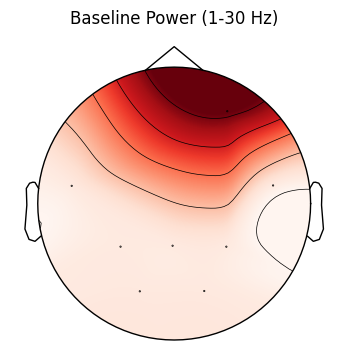

In [ ]:
import numpy as np
import mne
import matplotlib.pyplot as plt

# --------------------------------------------------------
# 1) YOUR CUSTOM CHANNEL NAMES (excluding GND and REF)
# --------------------------------------------------------
channel_names_custom = ["F4", "O1", "O2", "T5", "P3", "Pz", "P4", "T6"]

# We'll rename T5/T6 to T7/T8 for MNE's standard montage:
rename_dict = {"T5": "T7", "T6": "T8"}
channel_names_mne = [rename_dict[ch] if ch in rename_dict else ch 
                     for ch in channel_names_custom]

# All channels are EEG
channel_types = ["eeg"] * len(channel_names_mne)

sfreq = 256.0  # Updated to match EEG data

# Create MNE info
info = mne.create_info(ch_names=channel_names_mne, sfreq=sfreq, ch_types=channel_types)

# Attach a standard 10-20 montage
montage = mne.channels.make_standard_montage("standard_1020")
info.set_montage(montage)

# --------------------------------------------------------
# 2) LOAD EEG DATA (shape = [n_channels, n_times])
# --------------------------------------------------------
eeg_data = np.load("../data/eric/eeg/eeg_eric_session_1.npy")

# Ensure data shape is (8, n_times) by selecting relevant channels
data = eeg_data[:len(channel_names_mne), :]

# --------------------------------------------------------
# 3) Create a RawArray. If needed, do additional preprocessing.
# --------------------------------------------------------
raw = mne.io.RawArray(data, info)

raw.filter(1, 30)

# --------------------------------------------------------
# 4) Compute a measure for topoplot (e.g., average power in 1-30 Hz)
# --------------------------------------------------------
psd = raw.compute_psd(fmin=1, fmax=30, method="welch")
freqs = psd.freqs
psds = psd.get_data()
mean_psd = psds.mean(axis=1)

# --------------------------------------------------------
# 5) Plot topomap
# --------------------------------------------------------
fig, ax = plt.subplots(figsize=(5, 4))
mne.viz.plot_topomap(mean_psd, raw.info, axes=ax, show=False)
ax.set_title("Baseline Power (1-30 Hz)")
plt.show()